# 3.1 : Importation des packages & fonctions

In [1]:
# Importation des packages souhaités
%run P5_Packages.ipynb

In [2]:
import time

In [3]:
from collections import Counter

In [4]:
!pip install pyLDAvis

In [5]:
from gensim import corpora, models

In [6]:
from gensim.models import Nmf

In [7]:
import gensim
from pprint import pprint# number of topics
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [8]:
import pyLDAvis.gensim as gensimvis

In [9]:
import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

C:\Users\evari\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from matplotlib.ticker import MaxNLocator

C:\Users\evari\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

C:\Users\evari\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# import warnings

# warnings.filterwarnings(action='always')
# warnings.filterwarnings("ignore",category=DeprecationWarning)
# warnings.filterwarnings("ignore",category=ResourceWarning)

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\evari\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Importation du notebook contenant les fonctions

%run P5_Functions.ipynb

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\evari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
# Package to flatten a list
# get rid of [[ ]]
import itertools

# 3.2 : Importation des fichiers

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
importation = 'df_questions_cleaned.csv'
df_cleaned = pd.read_csv(importation, sep=',')

In [17]:
df_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...


In [18]:
df_txt_cleaned = df_cleaned['text']
df_txt_cleaned.head()

0    way class variable python python people initia...
1    entrypoint index html use htmlwebpackplugin us...
2    literate num notice math operator num way lite...
3    decker image use compile work cpu currently tr...
4    handle loss three j can not figure case loss a...
Name: text, dtype: object

# 3.3 : Creation du dictionnaire

In [19]:
list_txt_cleaned = df_txt_cleaned.copy()

In [20]:
list_txt_cleaned

0        way class variable python python people initia...
1        entrypoint index html use htmlwebpackplugin us...
2        literate num notice math operator num way lite...
3        decker image use compile work cpu currently tr...
4        handle loss three j can not figure case loss a...
                               ...                        
99981    azure devops pipeline run make error action gi...
99982    kotlin could find dk tool java installation ru...
99983    execute java cucumber step get step class atte...
99984    find character string letter try figure look s...
99985    use spi speech recognition b script find one l...
Name: text, Length: 99986, dtype: object

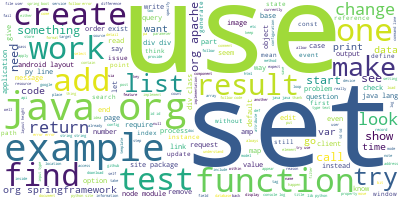

In [21]:
# Plot WordCloud
long_string = ','.join(list(df_txt_cleaned.values))# Create a WordCloud object

wordcloud = WordCloud(background_color="white",
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')# Generate a word cloud

wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [22]:
# Be sure to split sentence before feed into Dictionary
list_txt_cleaned = [d.split() for d in list_txt_cleaned] # Should turn into a list

In [23]:
# Build dictionary
dictionary = Dictionary(list_txt_cleaned)

In [24]:
# Number of vocabulary words
temp1 = len(dictionary)
print("Number of words inside vocab : ",len(dictionary))

Number of words inside vocab :  218224


In [25]:
# Number of vocabulary words after filtering
ntimes_w_down = 10
ntimes_w_up = 0.90

# Way to detect words that do not appear enough times
# Other solution directly inside countvectorizer function          

dictionary.filter_extremes(no_below = ntimes_w_down,
                          no_above = ntimes_w_up)
print("Number of words inside vocab after reduction: ", len(dictionary))
temp2 = len(dictionary)

Number of words inside vocab after reduction:  15291


In [26]:
prop_words_left = temp2/temp1 * 100
print("Proportion of words left : ", prop_words_left, ' % of initial volume')

Proportion of words left :  7.007020309406848  % of initial volume


In [27]:
# Let's print most present words inside vocab
# Detect useless ones to delete

n_top = 10 #1000

words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
id2token = {value: key for key, value in dictionary.token2id.items()}

print("Mots les plus fréquents du dictionnaire:")

for e, (i, count) in enumerate(words_sorted[:n_top]):
    print(f"{e+1:2} {id2token[i]:15} {count:5}")

Mots les plus fréquents du dictionnaire:
 1 use             56121
 2 get             38987
 3 try             34047
 4 like            30913
 5 work            30123
 6 code            29460
 7 would           23321
 8 want            23233
 9 error           23211
10 file            22796


In [28]:
# Choice to delete some words present many times that do not bring interesting info to our analysis
# Like :  thanks or please etc

remove_words = ['like', 'work', 'would', 'want', 'one', 'need', 'know', 'also',
                'com', 'see', 'can', 'not', 'could', 'look', 'seem',
                'question', 'give', 'two']

# 'something','unlike','however','thanks','another','please',

bad_ids = [dictionary.token2id[token] for token in remove_words]

dictionary.filter_tokens(bad_ids=bad_ids)

In [29]:
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

In [30]:
df_txt_cleaned = df_cleaned.copy()
df_txt_cleaned.shape

(99986, 14)

In [31]:
# We shall deleted chosen useless words
df_txt_cleaned['Cleaned_txt'] = df_txt_cleaned['text'].str.replace(pat, '', regex='True')

In [32]:
# Turn into a list again
list_txt_cleaned = df_txt_cleaned['Cleaned_txt'].copy()

# Be sure to split sentence before feed into Dictionary
list_txt_cleaned = [d.split() for d in list_txt_cleaned] # Should turn into a list

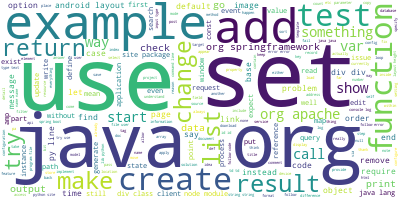

In [33]:
long_string = ','.join(list(df_txt_cleaned['Cleaned_txt'].values))# Create a WordCloud object

wordcloud = WordCloud(background_color="white",
                      max_words=1000, 
                      contour_width=3,
                      contour_color='steelblue')# Generate a word cloud

wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [34]:
# # Let's print most present words inside vocab
# # Detect useless ones to delete

# n_top = 100

# words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
# id2token = {value: key for key, value in dictionary.token2id.items()}

# print("Mots les plus fréquents du dictionnaire:")

# for e, (i, count) in enumerate(words_sorted[:n_top]):
#     print(f"{e+1:2} {id2token[i]:15} {count:5}")

# Exploration intermédiaire

In [35]:
# Get the word count
df_txt_cleaned['word_count'] = df_txt_cleaned['Cleaned_txt'].str.split().str.len()

df_txt_cleaned['word_count'].mean()

88.0450663092833

In [36]:
df_txt_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text,Cleaned_txt,word_count
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...,way class variable python python people initia...,35
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...,entrypoint index html use htmlwebpackplugin us...,96
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...,literate num notice math operator num way lite...,10
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...,decker image use compile cpu currently try us...,63
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...,handle loss three j figure case loss applica...,79


In [37]:
# Descriptive statistics for word count
df_txt_cleaned['word_count'].describe()

count    99986.000000
mean        88.045066
std        127.068061
min          1.000000
25%         31.000000
50%         54.000000
75%         98.000000
max       3223.000000
Name: word_count, dtype: float64

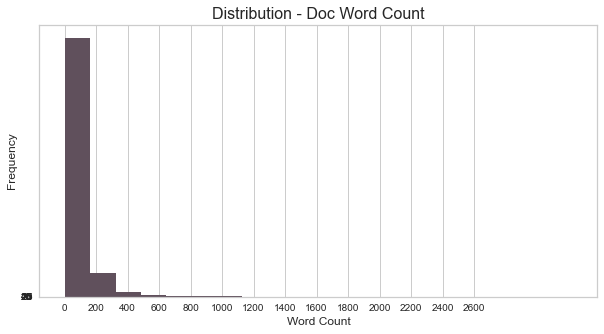

In [38]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_txt_cleaned['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Doc Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))

plt.show()

In [39]:
df_txt_cleaned['word_count']

0          35
1          96
2          10
3          63
4          79
         ... 
99981     283
99982    1131
99983      66
99984      19
99985     104
Name: word_count, Length: 99986, dtype: int64

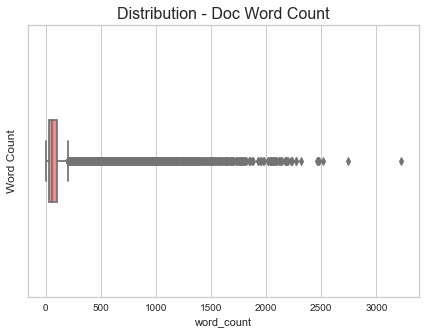

In [40]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(7,5))

sns.boxplot(
    df_txt_cleaned['word_count'],
    orient='v',
    width=.3,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Doc Word Count', fontsize=16)
# plt.yticks(np.arange(0, 2700, 100))

plt.show()

In [41]:
def df_Outliers_1_5_IQR(data, col):   
    
    # Calcul des quantiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
     # Formulation de l'écart IQR
    IQR = Q3 - Q1

    # Calcul des limites
    LowerLim = Q1 - 1.5*IQR
    UpperLim = Q3 + 1.5*IQR
    print('LowerLim : ', LowerLim, ' | UpperLim : ', UpperLim)
    
    # New dataframe with 1.5 IQR filtered data
    data = data[data[col] <= UpperLim]
    print('Shape after LowerLim filter : ', data.shape)
    data = data[data[col] >= LowerLim]
    print('Shape after UpperLim filter : ', data.shape)
        
    return data

In [42]:
col = 'word_count'
df_txt_cleaned = df_Outliers_1_5_IQR(df_txt_cleaned, col)

LowerLim :  -69.5  | UpperLim :  198.5
Shape after LowerLim filter :  (91880, 16)
Shape after UpperLim filter :  (91880, 16)


In [43]:
df_txt_cleaned[col].describe()

count    91880.000000
mean        61.379168
std         42.463553
min          1.000000
25%         29.000000
50%         49.000000
75%         83.000000
max        198.000000
Name: word_count, dtype: float64

In [44]:
# df_txt_cleaned.head()

In [45]:
# df_filtered = df_txt_cleaned[df_txt_cleaned['word_count'] < 75]
# df_filtered.head()

In [46]:
tab = Counter(" ".join(df_txt_cleaned["Cleaned_txt"]).split()).most_common(100)
tab[1]

('get', 58114)

In [47]:
topn = 20
tabtt = pd.Series(' '.join(df_txt_cleaned.text).split()).value_counts()[:topn]
# .lower()

In [48]:
tabtt_2 = pd.DataFrame({'word':tabtt.index, 'frequency':tabtt.values})

In [49]:
tabtt_2.head()

,word,frequency
0,use,95440
1,get,58114
2,file,52782
3,code,40732
4,try,40680


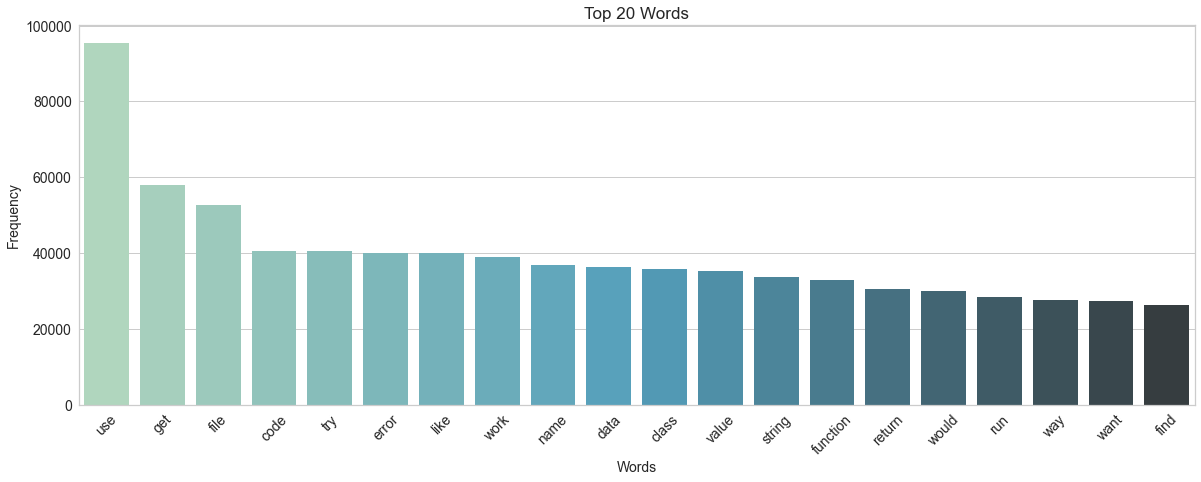

In [50]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=tabtt_2,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()



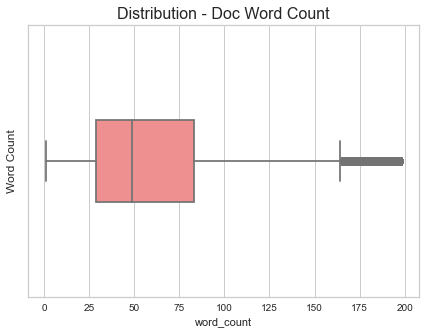

In [51]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(7,5))

sns.boxplot(
    df_txt_cleaned['word_count'],
    orient='v',
    width=.3,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Doc Word Count', fontsize=16)
# plt.yticks(np.arange(0, 2700, 100))

plt.show()

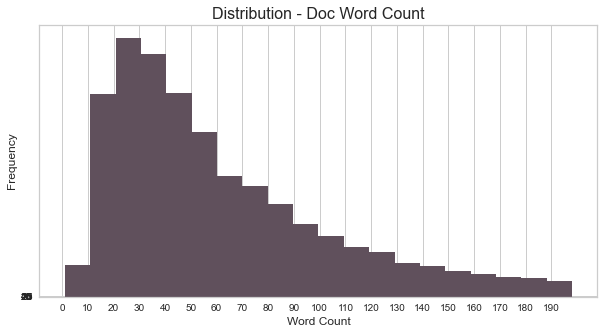

In [52]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_txt_cleaned['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Doc Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 200, 10))

plt.show()

In [53]:
df_txt_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text,Cleaned_txt,word_count
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...,way class variable python python people initia...,35
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...,entrypoint index html use htmlwebpackplugin us...,96
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...,literate num notice math operator num way lite...,10
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...,decker image use compile cpu currently try us...,63
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...,handle loss three j figure case loss applica...,79


In [54]:
df_txt_cleaned.shape

(91880, 16)

# Normalization des données

In [55]:
len(dictionary)

15273

## Bag of words

In [56]:
list_txt_cleaned[1:2]

[['entrypoint',
  'index',
  'html',
  'use',
  'htmlwebpackplugin',
  'use',
  'webpack',
  'create',
  'config',
  'file',
  'try',
  'use',
  'htmlwebpackplugin',
  'get',
  'entrypoint',
  'undefined',
  'index',
  'html',
  'open',
  'html',
  'appear',
  'get',
  'message',
  'console',
  'solve',
  'config',
  'file',
  'use',
  'const',
  'webpack',
  'require',
  'webpack',
  'const',
  'join',
  'resolve',
  'require',
  'path',
  'const',
  'htmlwebpackplugin',
  'require',
  'html',
  'webpack',
  'plugin',
  'module',
  'export',
  'mode',
  'development',
  'dev',
  'devtool',
  'module',
  'source',
  'map',
  'dev',
  'entry',
  'join',
  'dirname',
  'index',
  'j',
  'output',
  'filename',
  'path',
  'resolve',
  'dirname',
  'dist',
  'module',
  'rule',
  'test',
  'j',
  'exclude',
  'module',
  'babel',
  'loader',
  'resolve',
  'extension',
  'js',
  'j',
  'devserver',
  'contentbase',
  'resolve',
  'dirname',
  'build',
  'plugins',
  'webpack',
  'progress

In [57]:
corpus_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_txt_cleaned]

In [58]:
len(dictionary)

15273

In [59]:
# sample(corpus_bow, 3)

In [60]:
len(corpus_bow)

99986

In [61]:
print(corpus_bow[:1][0][:30])

[(0, 2), (1, 2), (2, 5), (3, 2), (4, 4), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 3), (13, 1), (14, 1), (15, 1), (16, 4)]


In [62]:
[corpus_bow[2]]

[[(16, 1), (67, 2), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1)]]

## TF-IDF

In [63]:
tfidf = models.TfidfModel(corpus_bow)

corpus_tfidf = tfidf[corpus_bow]

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5267339714009535),
 (1, 0.2318501958014747),
 (2, 0.2708192568465946),
 (3, 0.2050812985148443),
 (4, 0.37725821326658415),
 (5, 0.08390538909474206),
 (6, 0.21839773451595101),
 (7, 0.13210431987013863),
 (8, 0.3705312271971987),
 (9, 0.10554500321986868),
 (10, 0.13194954214825452),
 (11, 0.1500261843126956),
 (12, 0.30172921696660454),
 (13, 0.06592461228114638),
 (14, 0.09733761225882934),
 (15, 0.11014313339612261),
 (16, 0.1831339249769486)]


In [64]:
# Test pour compréhension

tfidf_2 = models.TfidfModel(corpus_bow[2:200])

corpus_tfidf_2 = tfidf_2[corpus_bow[2]]

from pprint import pprint
for doc in corpus_tfidf_2:
    pprint(doc)
    break
    
# Résumé : TF-IDF sur 1 seul texte n'a pas de sens !!
# On applique le predict sur le texte en format BOW
# Peu importe comment le modèle optimal a été entrainé

(16, 0.07477331086483313)


# Settings for coherence curves in each case

In [65]:
# Parameters for loop
start_topics = 5
limit_topics = 30
step_topics = 1

start, limit, step = start_topics, limit_topics, step_topics

# Global parameters
id2word = dictionary
dictionary = dictionary
texts = list_txt_cleaned

## Fonction pour gensim nmf and coherence

In [66]:
def coherence_gensim_nmf(corpus, id2word, dictionary, texts,
                         start, limit, step, alpha='asymmetric',
                         coherence='c_v'):
    # Initialisation
    coherence_values = []
    model_list = []
    
    # Get coherence curve with nmf
    ti = time.time()

# ------------------------------------------------------
    for num_topics in range(start, limit, step):

        t0 = time.time()

        model = gensim.models.Nmf(corpus=corpus,
                          num_topics=num_topics,
                          id2word=id2word,
                          random_state=10,)

        model_list.append(model)

        coherencevalue = CoherenceModel(model=model, 
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence=coherence).get_coherence()

        coherence_values.append(coherencevalue)

        # display training information along the way
        minutes, seconds = divmod(time.time()-t0, 60)

        str_perf = f"Nombre de topics: {num_topics:2} ... Valeur de coherence: {coherencevalue:.3} ... "
        str_time = f"Temps d'entrainement et d'évaluation: {round(minutes):2} minutes {round(seconds):2} secondes..."
        print(str_perf + str_time)
# ------------------------------------------------------    
    # display training information along the way
    print('Temps de la boucle entière')
    print("done in %0.3fs." % (time.time() - ti))
    
    return model_list, coherence_values

In [67]:
def coherence_gensim_lda(corpus, id2word, dictionary, texts,
                         start, limit, step, alpha='asymmetric',
                         coherence='c_v'):
    # Initialisation
    coherence_values = []
    model_list = []
    
    
    # Loop to get coherence which depends on nb of topics
    ti = time.time()

# ------------------------------------------------------
    for num_topics in range(start, limit, step):

        t0 = time.time()

        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           alpha=alpha,
                                           num_topics=num_topics)

        model_list.append(model)

        coherencevalue = CoherenceModel(model=model, 
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence=coherence).get_coherence()

        coherence_values.append(coherencevalue)

        # display training information along the way
        minutes, seconds = divmod(time.time()-t0, 60)

        str_perf = f"Nombre de topics: {num_topics:2} ... Valeur de coherence: {coherencevalue:.3} ... "
        str_time = f"Temps d'entrainement et d'évaluation: {round(minutes):2} minutes {round(seconds):2} secondes..."
        print(str_perf + str_time)
# ------------------------------------------------------
    # display training information along the way
    print('Temps de la boucle entière')
    print("done in %0.3fs." % (time.time() - ti))
    
    return model_list, coherence_values

In [68]:
def plot_coherence_curve(coherence_values, start, limit, 
                         step, title, min_coherence, max_coherence):
    
    # Force xlabels into integers as it sould be
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.set_xlim([0, limit])
    ax.set_ylim([min_coherence-0.01*min_coherence, 
                 max_coherence+0.01*max_coherence])

    # Coherence depening on nb of topics
    n_topics = range(start, limit, step)
    plt.plot(n_topics, coherence_values, 'r-', linewidth='2')
    plt.plot(n_topics, coherence_values, 'ro', linewidth='5')

    plt.xlabel("Number of topics")
    plt.ylabel("Coherence score")
    plt.title(title);


# LDA model | Bag of words | GENSIM

In [69]:
# num_topics = 10# Build LDA model

In [70]:

# lda_model = gensim.models.LdaMulticore(corpus=corpus_bow,
#                                        id2word=dictionary,
#                                        alpha='asymmetric',
#                                        num_topics=num_topics)# Print the Keyword in the 10 topics

In [71]:
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus_bow]

In [72]:
# cm = CoherenceModel(model=lda_model, 
#                     texts=list_txt_cleaned,
#                     #coherence='u_mass'
#                    )

# coherence = cm.get_coherence()  # get coherence value
# coherence

In [73]:
# Initialisation
#-------------------------------------------
# coherence_values_lda_bow = []
# model_list_lda_bow = []
# #-------------------------------------------
# coherence_values = coherence_values_lda_bow
# model_list = model_list_lda_bow
#-------------------------------------------
# Parameters
# corpus = corpus_bow
#-------------------------------------------

In [74]:
model_list_lda_bow, coherence_values_lda_bow = coherence_gensim_lda(corpus_bow, id2word, dictionary, texts, start, limit, step)

Nombre de topics:  5 ... Valeur de coherence: 0.506 ... Temps d'entrainement et d'évaluation:  1 minutes 23 secondes...
Nombre de topics:  6 ... Valeur de coherence: 0.517 ... Temps d'entrainement et d'évaluation:  1 minutes 21 secondes...
Nombre de topics:  7 ... Valeur de coherence: 0.48 ... Temps d'entrainement et d'évaluation:  2 minutes 28 secondes...
Nombre de topics:  8 ... Valeur de coherence: 0.466 ... Temps d'entrainement et d'évaluation:  2 minutes 20 secondes...
Nombre de topics:  9 ... Valeur de coherence: 0.483 ... Temps d'entrainement et d'évaluation:  2 minutes 19 secondes...
Nombre de topics: 10 ... Valeur de coherence: 0.517 ... Temps d'entrainement et d'évaluation:  2 minutes 22 secondes...
Nombre de topics: 11 ... Valeur de coherence: 0.519 ... Temps d'entrainement et d'évaluation:  2 minutes 11 secondes...
Nombre de topics: 12 ... Valeur de coherence: 0.518 ... Temps d'entrainement et d'évaluation:  1 minutes 47 secondes...
Nombre de topics: 13 ... Valeur de cohere

# LDA model | TF-IDF | GENSIM

In [75]:
# # Initialize parameters for LDA_TF-IDF
# num_topics = 10
# corpus = corpus_tfidf
# id2word = dictionary
# alpha = 'asymmetric'

In [76]:
# # Build the LDA model with TF-IDF
# lda_model_tfidf = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=dictionary,
#                                        alpha=alpha,
#                                        num_topics=num_topics)# Print the Keyword in the 10 topics

In [77]:
# # Print topics with associated weights on words
# pprint(lda_model_tfidf.print_topics())
# doc_lda_tfidf = lda_model_tfidf[corpus]

In [78]:
# Initialisation & Parameters
#-------------------------------------------
# coherence_values_lda_tfidf = []
# model_list_lda_tfidf = []
# #-------------------------------------------
# coherence_values = coherence_values_lda_tfidf
# model_list = model_list_lda_tfidf
# #-------------------------------------------
# corpus = corpus_tfidf
# id2word = dictionary
# dictionary = dictionary
# texts = list_txt_cleaned
# model = model_lda_tfidf
#-------------------------------------------

In [79]:
model_list_lda_tfidf, coherence_values_lda_tfidf = coherence_gensim_lda(corpus_tfidf, id2word, dictionary, texts, start, limit, step)

Nombre de topics:  5 ... Valeur de coherence: 0.538 ... Temps d'entrainement et d'évaluation:  1 minutes 13 secondes...
Nombre de topics:  6 ... Valeur de coherence: 0.526 ... Temps d'entrainement et d'évaluation:  1 minutes  6 secondes...
Nombre de topics:  7 ... Valeur de coherence: 0.526 ... Temps d'entrainement et d'évaluation:  1 minutes  6 secondes...
Nombre de topics:  8 ... Valeur de coherence: 0.511 ... Temps d'entrainement et d'évaluation:  1 minutes  2 secondes...
Nombre de topics:  9 ... Valeur de coherence: 0.526 ... Temps d'entrainement et d'évaluation:  1 minutes  3 secondes...
Nombre de topics: 10 ... Valeur de coherence: 0.515 ... Temps d'entrainement et d'évaluation:  1 minutes  2 secondes...
Nombre de topics: 11 ... Valeur de coherence: 0.505 ... Temps d'entrainement et d'évaluation:  1 minutes  3 secondes...
Nombre de topics: 12 ... Valeur de coherence: 0.541 ... Temps d'entrainement et d'évaluation:  1 minutes  7 secondes...
Nombre de topics: 13 ... Valeur de coher

# NMF | Bag_Of_Words | GENSIM

In [80]:
# Parameters & Initialisation
#-------------------------------------------
# coherence_values_nmf_bow = []
# model_list_nmf_bow = []
#-------------------------------------------
# coherence_values = coherence_values_nmf_bow
# model_list = model_list_nmf_bow
#-------------------------------------------
# texts = list_txt_cleaned
# dictionary = dictionary
# id2word = dictionary
# corpus = corpus_bow
# model = model_list_nmf_bow
#-------------------------------------------

In [81]:
# # Premier passage test
# nmf = gensim.models.Nmf(
#     corpus=corpus,
#     num_topics=num_topics,
#     id2word=id2word,
#     chunksize=1000,
#     passes=5,
#     eval_every=10,
#     minimum_probability=0,
#     random_state=0,
#     kappa=1,)

In [82]:
# nmf.show_topics()

In [83]:
model_list_nmf_bow, coherence_values_nmf_bow = coherence_gensim_nmf(corpus_bow, id2word, dictionary, texts, start, limit, step)

Nombre de topics:  5 ... Valeur de coherence: 0.531 ... Temps d'entrainement et d'évaluation:  0 minutes 30 secondes...
Nombre de topics:  6 ... Valeur de coherence: 0.579 ... Temps d'entrainement et d'évaluation:  0 minutes 33 secondes...
Nombre de topics:  7 ... Valeur de coherence: 0.583 ... Temps d'entrainement et d'évaluation:  0 minutes 36 secondes...
Nombre de topics:  8 ... Valeur de coherence: 0.576 ... Temps d'entrainement et d'évaluation:  0 minutes 38 secondes...
Nombre de topics:  9 ... Valeur de coherence: 0.573 ... Temps d'entrainement et d'évaluation:  0 minutes 41 secondes...
Nombre de topics: 10 ... Valeur de coherence: 0.58 ... Temps d'entrainement et d'évaluation:  0 minutes 43 secondes...
Nombre de topics: 11 ... Valeur de coherence: 0.571 ... Temps d'entrainement et d'évaluation:  0 minutes 49 secondes...
Nombre de topics: 12 ... Valeur de coherence: 0.568 ... Temps d'entrainement et d'évaluation:  0 minutes 49 secondes...
Nombre de topics: 13 ... Valeur de cohere

# NMF | TF-IDF | GENSIM

In [84]:
# Parameters & Initialisation
#-------------------------------------------
# coherence_values_nmf_tfidf = []
# model_list_nmf_tfidf = []
#-------------------------------------------
# coherence_values = coherence_values_nmf_tfidf
# model_list = model_list_nmf_tfidf
#-------------------------------------------
# texts = list_txt_cleaned
# dictionary = dictionary
# id2word = dictionary
# corpus = corpus_tfidf
# model = model_list_nmf_tfidf
#-------------------------------------------

In [85]:
model_list_nmf_tfidf, coherence_values_nmf_tfidf = coherence_gensim_nmf(corpus_tfidf, id2word, dictionary, texts, start, limit, step)

Nombre de topics:  5 ... Valeur de coherence: 0.503 ... Temps d'entrainement et d'évaluation:  0 minutes 55 secondes...
Nombre de topics:  6 ... Valeur de coherence: 0.481 ... Temps d'entrainement et d'évaluation:  0 minutes 56 secondes...
Nombre de topics:  7 ... Valeur de coherence: 0.546 ... Temps d'entrainement et d'évaluation:  0 minutes 58 secondes...
Nombre de topics:  8 ... Valeur de coherence: 0.556 ... Temps d'entrainement et d'évaluation:  1 minutes  1 secondes...
Nombre de topics:  9 ... Valeur de coherence: 0.507 ... Temps d'entrainement et d'évaluation:  1 minutes  4 secondes...
Nombre de topics: 10 ... Valeur de coherence: 0.569 ... Temps d'entrainement et d'évaluation:  1 minutes  8 secondes...
Nombre de topics: 11 ... Valeur de coherence: 0.62 ... Temps d'entrainement et d'évaluation:  1 minutes 11 secondes...
Nombre de topics: 12 ... Valeur de coherence: 0.592 ... Temps d'entrainement et d'évaluation:  1 minutes 13 secondes...
Nombre de topics: 13 ... Valeur de cohere

# NMF model | TF-IDF | Sklearn

In [86]:
# pro : allows visualisation
# cons : slower and slightly less precise according to litterature

In [87]:
def plot_top_words(model, feature_names, n_top_words, title, fig_row, fig_col):
    fig, axes = plt.subplots(fig_row, fig_col, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [88]:
text_nmf = df_txt_cleaned['Cleaned_txt']
#df_cleaned['text']
text_nmf

0        way class variable python python people initia...
1        entrypoint index html use htmlwebpackplugin us...
2        literate num notice math operator num way lite...
3        decker image use compile  cpu currently try us...
4        handle loss three j   figure case loss applica...
                               ...                        
99979    remove son element jackson son node correspond...
99980    python panda replicate row dataframe dataframe...
99983    execute java cucumber step get step class atte...
99984    find character string letter try figure  strin...
99985    use spi speech recognition b script find  line...
Name: Cleaned_txt, Length: 91880, dtype: object

In [89]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(#max_df=0.95, min_df=2,
                                   #max_features=n_features,
                                   stop_words='english')



t0 = time.time()
tfidf = tfidf_vectorizer.fit_transform(text_nmf)
print("done in %0.3fs." % (time.time() - t0))

Extracting tf-idf features for NMF...
done in 5.679s.


In [90]:
n_topics_optim = 6

# Fit the NMF model
t0 = time.time()

nmf = NMF(n_components=n_topics_optim, 
          random_state=10,
          alpha=.1, 
          l1_ratio=.5,
         init='nndsvda').fit(tfidf)

print("Fitting done in %0.3fs." % (time.time() - t0))


Fitting done in 22.241s.


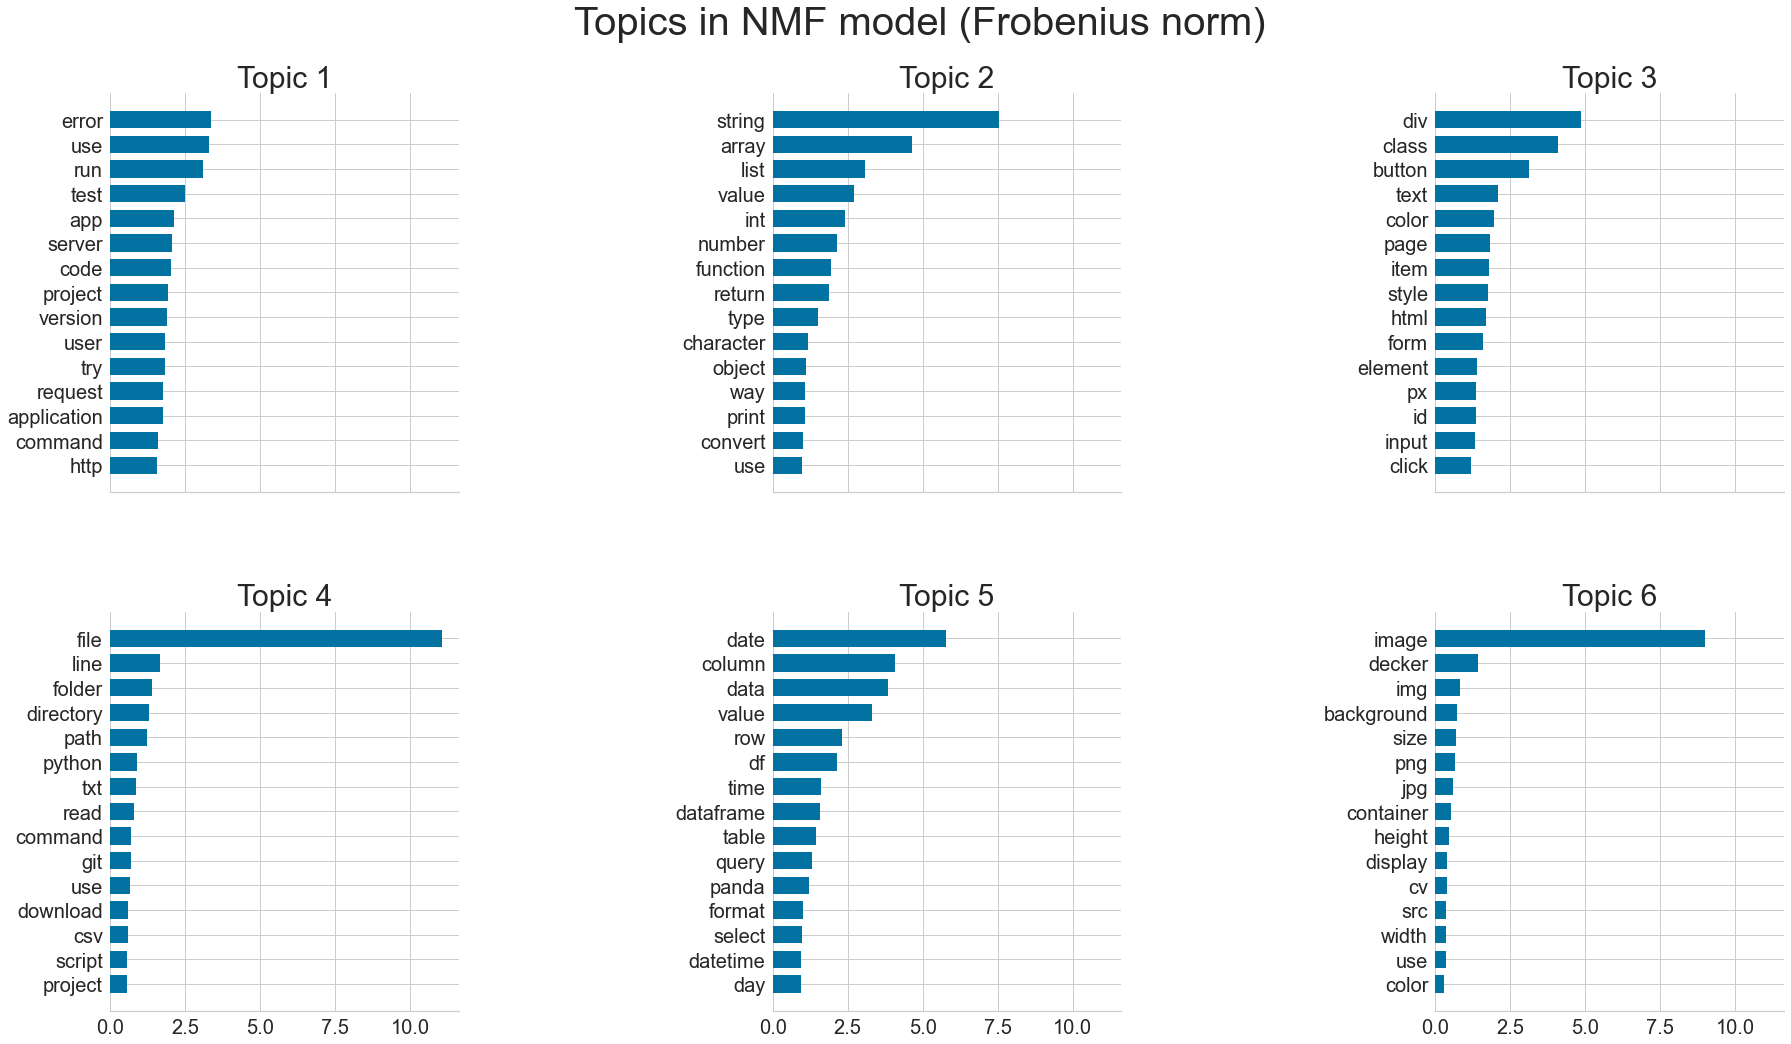

In [91]:
# Parameter initialization
n_top_words = 15
fig_row = 2
fig_col = 3
# Be aware : row*col = nnumber of topics

# Visualisation of top words inside topics

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

plot_top_words(nmf, 
               tfidf_feature_names, 
               n_top_words,
               'Topics in NMF model (Frobenius norm)',
               fig_row,
               fig_col,)

In [92]:
len(nmf.components_)

6

# Selection du meilleur modèle

## Courbes des scores de coherence dans chaque cas

In [93]:
# Parameters & Initialisation
min_coherence = min(min(coherence_values_lda_bow),
                    min(coherence_values_lda_tfidf), 
                    min(coherence_values_nmf_bow),
                    min(coherence_values_nmf_tfidf)
                   )
max_coherence = max(max(coherence_values_lda_bow),
                    max(coherence_values_lda_tfidf), 
                    max(coherence_values_nmf_bow),
                    max(coherence_values_nmf_tfidf)
                   )
print('min_coherence :', min_coherence, '\n', 'max_coherence', max_coherence)

min_coherence : 0.4656767736490818 
 max_coherence 0.6201575000510041


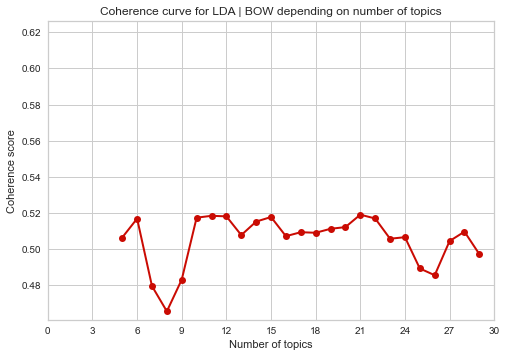

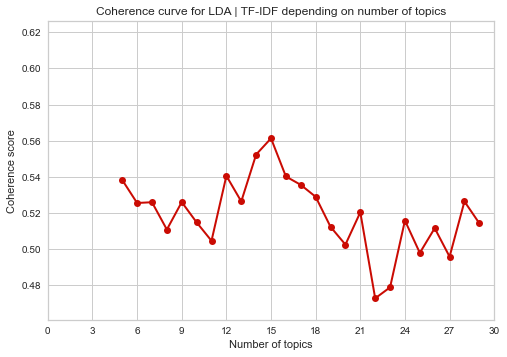

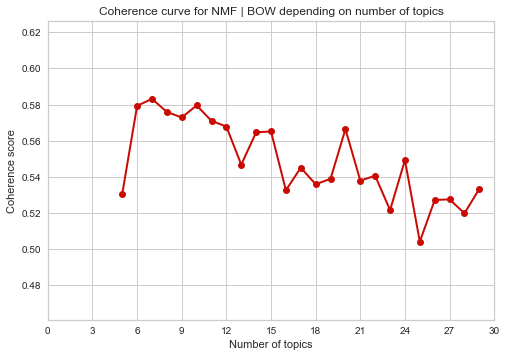

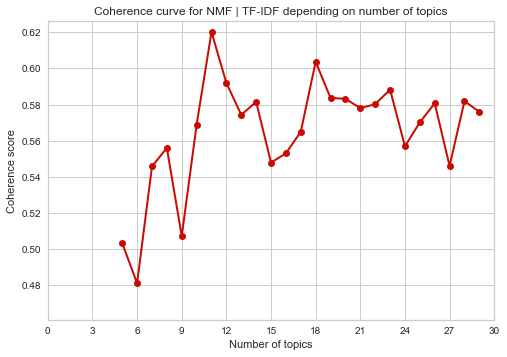

In [94]:
title = "Coherence curve for LDA | BOW depending on number of topics"
plot_coherence_curve(coherence_values_lda_bow, start, limit, step, title, min_coherence, max_coherence)

title = "Coherence curve for LDA | TF-IDF depending on number of topics"
plot_coherence_curve(coherence_values_lda_tfidf, start, limit, step, title, min_coherence, max_coherence)

title = "Coherence curve for NMF | BOW depending on number of topics"
plot_coherence_curve(coherence_values_nmf_bow, start, limit, step, title, min_coherence, max_coherence)

title = "Coherence curve for NMF | TF-IDF depending on number of topics"
plot_coherence_curve(coherence_values_nmf_tfidf, start, limit, step, title, min_coherence, max_coherence)

## Nombre de topics optimal dans chaque cas

### LDA - TF-IDF

In [95]:
# Optimal model chosen
optimal_model_lda_tfidf = model_list_lda_tfidf[9]

In [96]:
optimal_model_lda_tfidf.show_topics(formatted=False)
pprint(optimal_model_lda_tfidf.print_topics(num_words=10))

[(0,
  '0.005*"file" + 0.004*"string" + 0.004*"error" + 0.003*"name" + 0.003*"java" '
  '+ 0.003*"test" + 0.003*"use" + 0.003*"run" + 0.003*"get" + 0.003*"data"'),
 (1,
  '0.008*"div" + 0.007*"button" + 0.006*"image" + 0.005*"page" + 0.005*"text" '
  '+ 0.005*"color" + 0.005*"class" + 0.004*"style" + 0.004*"form" + '
  '0.004*"html"'),
 (2,
  '0.012*"date" + 0.012*"array" + 0.009*"value" + 0.009*"column" + '
  '0.008*"list" + 0.008*"df" + 0.008*"string" + 0.008*"number" + 0.007*"plot" '
  '+ 0.007*"row"'),
 (3,
  '0.013*"selenium" + 0.010*"webdriver" + 0.010*"cookie" + 0.008*"route" + '
  '0.007*"driver" + 0.007*"socket" + 0.007*"express" + 0.007*"cooky" + '
  '0.007*"chrome" + 0.007*"router"'),
 (4,
  '0.057*"android" + 0.043*"layout" + 0.016*"textview" + 0.013*"parent" + '
  '0.011*"recyclerview" + 0.011*"dp" + 0.010*"id" + 0.010*"height" + '
  '0.009*"wrap" + 0.009*"match"'),
 (5,
  '0.020*"token" + 0.011*"oath" + 0.011*"authorization" + 0.009*"oauth" + '
  '0.009*"whatsapp" + 0.009

In [97]:
viz_lda_tfidf = gensimvis.prepare(optimal_model_lda_tfidf, corpus_tfidf, dictionary)
viz_lda_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.181056 -0.037586       1        1  57.392237
1     -0.257724  0.002824       2        1  18.482444
2     -0.282812 -0.027222       3        1   9.460977
3     -0.162834 -0.080127       4        1   2.907267
4     -0.086311  0.244135       5        1   2.288189
5      0.030268 -0.054252       6        1   1.547028
6      0.067938 -0.023318       7        1   1.245730
11     0.140734  0.017186       8        1   1.160922
7      0.097237 -0.013515       9        1   1.124135
8      0.139778 -0.008254      10        1   1.078569
10     0.129759 -0.015153      11        1   0.932264
9      0.109547 -0.004109      12        1   0.926580
12     0.129727  0.004185      13        1   0.767072
13     0.125748 -0.004796      14        1   0.686587, topic_info=         Term         Freq        Total Category  logprob  loglift
505   android   975.000000   975.000000  Default  30.0000  30.0000
653    layout   581.000000   581.000000  Default  29.0000  29.0000
427    spring   464.000000   464.000000  Default  28.0000  28.0000
261      java  1058.000000  1058.000000  Default  27.0000  27.0000
172       org   492.000000   492.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
979       doc     0.718091   236.497085  Topic14  -8.3232  -0.8159
972   request     0.797228   746.012975  Topic14  -8.2187  -1.8602
1280   client     0.766662   555.290917  Topic14  -8.2578  -1.6040
533     start     0.684983   554.618463  Topic14  -8.3704  -1.7154
204    method     0.621430   730.405101  Topic14  -8.4678  -2.0881

[812 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
461       1  0.719974  access
461       2  0.147965  access
461       3  0.036089  access
461       4  0.036089  access
461       5  0.005413  access
...     ...       ...     ...
460       3  0.571068    year
460       4  0.004681    year
460       5  0.004681    year
460       7  0.004681    year
5417      6  0.769648   zxing

[2734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 12, 8, 9, 11, 10, 13, 14])

### LDA - BOW

In [98]:
# Optimal model chosen
optimal_model_lda_bow = model_list_lda_bow[13]

In [99]:
optimal_model_lda_bow.show_topics(formatted=False)
pprint(optimal_model_lda_bow.print_topics(num_words=10))

[(0,
  '0.044*"file" + 0.018*"use" + 0.010*"get" + 0.008*"folder" + 0.008*"path" + '
  '0.008*"model" + 0.008*"create" + 0.008*"make" + 0.008*"try" + 0.008*"name"'),
 (1,
  '0.030*"use" + 0.012*"way" + 0.012*"code" + 0.010*"run" + 0.010*"get" + '
  '0.007*"find" + 0.007*"try" + 0.007*"row" + 0.007*"function" + '
  '0.006*"window"'),
 (2,
  '0.036*"name" + 0.028*"value" + 0.021*"list" + 0.020*"item" + 0.020*"array" '
  '+ 0.017*"id" + 0.014*"model" + 0.012*"use" + 0.011*"map" + 0.010*"get"'),
 (3,
  '0.036*"string" + 0.023*"file" + 0.023*"python" + 0.020*"line" + 0.017*"use" '
  '+ 0.014*"get" + 0.012*"py" + 0.011*"result" + 0.010*"error" + 0.010*"lib"'),
 (4,
  '0.043*"data" + 0.030*"date" + 0.019*"df" + 0.018*"time" + 0.012*"string" + '
  '0.011*"use" + 0.011*"get" + 0.010*"value" + 0.010*"column" + '
  '0.009*"dataframe"'),
 (5,
  '0.020*"user" + 0.019*"log" + 0.017*"use" + 0.014*"file" + 0.014*"request" + '
  '0.014*"function" + 0.011*"page" + 0.011*"get" + 0.010*"error" + '
  '0.00

In [100]:
viz_lda_bow = gensimvis.prepare(optimal_model_lda_bow, corpus_bow, dictionary)
viz_lda_bow

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.049157 -0.054213       1        1  9.476565
16     0.092077 -0.155182       2        1  9.016174
5      0.004805 -0.089827       3        1  7.673182
2     -0.105000  0.047380       4        1  6.764710
10    -0.086013  0.012980       5        1  6.661465
8      0.079213 -0.072851       6        1  6.161630
6     -0.020584  0.011075       7        1  5.893466
0     -0.010538 -0.098996       8        1  5.889086
17     0.292522  0.138064       9        1  5.844579
14    -0.123788  0.025546      10        1  5.800163
3     -0.010797 -0.069949      11        1  5.695245
13    -0.120152  0.036036      12        1  4.938124
4      0.006277  0.072017      13        1  4.239614
7      0.115328  0.021867      14        1  4.229593
11    -0.107720  0.135289      15        1  3.406294
15     0.026393 -0.032612      16        1  3.183448
9      0.021780  0.085268      17        1  2.961398
12    -0.004645 -0.011892      18        1  2.165263, topic_info=         Term          Freq         Total Category  logprob  loglift
261      java  62842.000000  62842.000000  Default  30.0000  30.0000
172       org  34375.000000  34375.000000  Default  29.0000  29.0000
505   android  24350.000000  24350.000000  Default  28.0000  28.0000
1488      div  21890.000000  21890.000000  Default  27.0000  27.0000
36       file  75430.000000  75430.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
196      code    972.300473  53354.725388  Topic18  -5.2055  -0.1724
266      name    929.957162  60630.415514  Topic18  -5.2500  -0.3448
84      error    874.897943  62521.434137  Topic18  -5.3110  -0.4365
371        id    808.388069  33305.894008  Topic18  -5.3901   0.1142
189       add    756.053534  29203.469086  Topic18  -5.4570   0.1787

[1712 rows x 6 columns], token_table=       Topic      Freq                     Term
term                                           
14160      9  0.953573  abstractentitypersister
14160     14  0.013622  abstractentitypersister
14160     16  0.013622  abstractentitypersister
10944      9  0.979237         abstractpipeline
10944     14  0.008822         abstractpipeline
...      ...       ...                      ...
6916      12  0.002328               zygoteinit
6916      13  0.012802               zygoteinit
6916      14  0.005819               zygoteinit
6916      16  0.005819               zygoteinit
6916      17  0.942664               zygoteinit

[12526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 6, 3, 11, 9, 7, 1, 18, 15, 4, 14, 5, 8, 12, 16, 10, 13])

### NMF - TF-IDF

In [101]:
# Optimal model chosen
optimal_model_nmf_tfidf = model_list_nmf_tfidf[6]

In [102]:
optimal_model_nmf_tfidf.show_topics(formatted=False)
pprint(optimal_model_nmf_tfidf.print_topics(num_words=10))

[(0,
  '0.015*"request" + 0.010*"response" + 0.008*"log" + 0.008*"http" + '
  '0.007*"git" + 0.007*"error" + 0.007*"message" + 0.007*"son" + 0.007*"api" + '
  '0.006*"data"'),
 (1,
  '0.035*"file" + 0.010*"command" + 0.010*"decker" + 0.010*"python" + '
  '0.010*"project" + 0.009*"run" + 0.009*"folder" + 0.008*"line" + '
  '0.008*"directory" + 0.008*"package"'),
 (2,
  '0.068*"android" + 0.041*"layout" + 0.014*"parent" + 0.013*"id" + '
  '0.012*"app" + 0.012*"height" + 0.012*"view" + 0.011*"activity" + '
  '0.010*"width" + 0.009*"wrap"'),
 (3,
  '0.051*"array" + 0.020*"number" + 0.018*"value" + 0.017*"test" + 0.015*"int" '
  '+ 0.011*"function" + 0.009*"return" + 0.008*"type" + 0.008*"object" + '
  '0.007*"string"'),
 (4,
  '0.032*"module" + 0.031*"j" + 0.020*"import" + 0.019*"node" + 0.017*"react" '
  '+ 0.014*"app" + 0.013*"component" + 0.010*"webpack" + 0.009*"const" + '
  '0.009*"num"'),
 (5,
  '0.080*"date" + 0.018*"time" + 0.014*"format" + 0.014*"datetime" + '
  '0.013*"day" + 0.0

### NMF - BOW

In [103]:
# Optimal model chosen
optimal_model_nmf_bow = model_list_nmf_bow[2]

In [104]:
optimal_model_nmf_bow.show_topics(formatted=False)
pprint(optimal_model_nmf_bow.print_topics(num_words=10))

[(0,
  '0.085*"android" + 0.055*"layout" + 0.032*"id" + 0.021*"app" + '
  '0.016*"height" + 0.016*"parent" + 0.015*"content" + 0.014*"width" + '
  '0.013*"view" + 0.013*"wrap"'),
 (1,
  '0.121*"org" + 0.058*"apache" + 0.041*"java" + 0.029*"grade" + 0.024*"scale" '
  '+ 0.023*"spark" + 0.016*"http" + 0.015*"name" + 0.015*"execution" + '
  '0.014*"error"'),
 (2,
  '0.139*"java" + 0.046*"org" + 0.042*"springframework" + 0.029*"jar" + '
  '0.024*"release" + 0.022*"spring" + 0.020*"core" + 0.015*"bean" + '
  '0.012*"web" + 0.012*"support"'),
 (3,
  '0.026*"string" + 0.017*"system" + 0.016*"use" + 0.014*"error" + 0.013*"get" '
  '+ 0.010*"return" + 0.009*"int" + 0.008*"code" + 0.007*"set" + 0.007*"http"'),
 (4,
  '0.037*"file" + 0.023*"python" + 0.020*"py" + 0.019*"line" + 0.018*"package" '
  '+ 0.017*"lib" + 0.015*"user" + 0.014*"module" + 0.012*"error" + '
  '0.011*"self"'),
 (5,
  '0.037*"class" + 0.028*"name" + 0.022*"div" + 0.019*"value" + 0.018*"type" + '
  '0.016*"data" + 0.013*"span"

# Choix modèle optimal final

In [105]:
optimal_model_nmf_tfidf = model_list_nmf_tfidf[6]

In [106]:
model_topics = optimal_model_nmf_tfidf.show_topics(formatted=False)
pprint(optimal_model_nmf_tfidf.print_topics(num_words=10))

[(0,
  '0.015*"request" + 0.010*"response" + 0.008*"log" + 0.008*"http" + '
  '0.007*"git" + 0.007*"error" + 0.007*"message" + 0.007*"son" + 0.007*"api" + '
  '0.006*"data"'),
 (1,
  '0.035*"file" + 0.010*"command" + 0.010*"decker" + 0.010*"python" + '
  '0.010*"project" + 0.009*"run" + 0.009*"folder" + 0.008*"line" + '
  '0.008*"directory" + 0.008*"package"'),
 (2,
  '0.068*"android" + 0.041*"layout" + 0.014*"parent" + 0.013*"id" + '
  '0.012*"app" + 0.012*"height" + 0.012*"view" + 0.011*"activity" + '
  '0.010*"width" + 0.009*"wrap"'),
 (3,
  '0.051*"array" + 0.020*"number" + 0.018*"value" + 0.017*"test" + 0.015*"int" '
  '+ 0.011*"function" + 0.009*"return" + 0.008*"type" + 0.008*"object" + '
  '0.007*"string"'),
 (4,
  '0.032*"module" + 0.031*"j" + 0.020*"import" + 0.019*"node" + 0.017*"react" '
  '+ 0.014*"app" + 0.013*"component" + 0.010*"webpack" + 0.009*"const" + '
  '0.009*"num"'),
 (5,
  '0.080*"date" + 0.018*"time" + 0.014*"format" + 0.014*"datetime" + '
  '0.013*"day" + 0.0

In [107]:
optimal_model = optimal_model_nmf_tfidf

for i in range(optimal_model.num_topics):
    desc = optimal_model.show_topic(i, topn=5)
    words = ', '.join([word for word, prob in desc])
    print(f'Topic #{i+1:2}:\n\t', words)

Topic # 1:
	 request, response, log, http, git
Topic # 2:
	 file, command, decker, python, project
Topic # 3:
	 android, layout, parent, id, app
Topic # 4:
	 array, number, value, test, int
Topic # 5:
	 module, j, import, node, react
Topic # 6:
	 date, time, format, datetime, day
Topic # 7:
	 list, item, column, value, row
Topic # 8:
	 java, org, apache, springframework, class
Topic # 9:
	 image, event, function, script, text
Topic #10:
	 div, class, button, px, form
Topic #11:
	 string, model, database, user, name


# Finding the Dominant_Topic in each sentence

In [108]:
def format_topics_sentences(model, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant_Topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => Dominant_Topic
                wp = model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), 
                                                                  ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic',
                              'Perc_Contribution',
                              'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [109]:
corpus = corpus_tfidf

In [110]:
df_topic_sents_keywords = format_topics_sentences(optimal_model, 
                                                  corpus, 
                                                  list_txt_cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No',
                             'Dominant_Topic',
                             'Topic_Perc_Contrib',
                             'Keywords',
                             'Text']

# Show
df_dominant_topic.head(11)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.3851,"div, class, button, px, form, style, html, inp...","[way, class, variable, python, python, people,..."
1,1,4.0,0.9280,"module, j, import, node, react, app, component...","[entrypoint, index, html, use, htmlwebpackplug..."
2,2,4.0,0.4817,"module, j, import, node, react, app, component...","[literate, num, notice, math, operator, num, w..."
3,3,8.0,0.6517,"image, event, function, script, text, javascri...","[decker, image, use, compile, cpu, currently, ..."
4,4,8.0,0.6431,"image, event, function, script, text, javascri...","[handle, loss, three, j, figure, case, loss, a..."
5,5,9.0,0.4590,"div, class, button, px, form, style, html, inp...","[input, text, color, io, simple, html, display..."
6,6,8.0,0.5674,"image, event, function, script, text, javascri...","[crt, polymorphism, use, crt, avoid, member, f..."
7,7,8.0,0.3251,"image, event, function, script, text, javascri...","[convert, uicolor, display, nslog, link, conve..."
8,8,7.0,0.8400,"java, org, apache, springframework, class, jar...","[define, stream, result, annotation, export, s..."
9,9,0.0,0.7925,"request, response, log, http, git, error, mess...","[custom, domain, name, websockets, api, server..."


In [111]:
df_topic_sents_keywords.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,9.0,0.3851,"div, class, button, px, form, style, html, inp...","[way, class, variable, python, python, people,..."
1,4.0,0.9280,"module, j, import, node, react, app, component...","[entrypoint, index, html, use, htmlwebpackplug..."
2,4.0,0.4817,"module, j, import, node, react, app, component...","[literate, num, notice, math, operator, num, w..."
3,8.0,0.6517,"image, event, function, script, text, javascri...","[decker, image, use, compile, cpu, currently, ..."
4,8.0,0.6431,"image, event, function, script, text, javascri...","[handle, loss, three, j, figure, case, loss, a..."


In [112]:
# Group top 5 sentences under each topic
top_sentences = 1

df_sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    df_sent_topics_sorted = pd.concat([df_sent_topics_sorted,
                                       grp.sort_values(['Perc_Contribution'],
                                       ascending=[0]).head(top_sentences)],
                                       axis=0)

# # Reset Index    
df_sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
df_sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
df_sent_topics_sorted.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,1.0,"request, response, log, http, git, error, mess...","[auto, commit, feature, branch, do, feature, o..."
1,1.0,1.0,"file, command, decker, python, project, run, f...","[iphone, dsym, file, locate, crash, report, ac..."
2,2.0,1.0,"android, layout, parent, id, app, height, view...","[viewstubproxy, unresolved, reference, kotlin,..."
3,3.0,1.0,"array, number, value, test, int, function, ret...","[three, dot, operator, initialize, array, cons..."
4,4.0,1.0,"module, j, import, node, react, app, component...","[typescript, babel, sourcemaps, use, webpack, ..."
5,5.0,1.0,"date, time, format, datetime, day, python, mon...","[query, datepicker, select, date, today, date,..."
6,6.0,1.0,"list, item, column, value, row, df, data, data...","[list, tuple, list, lst, split, list, without,..."
7,7.0,1.0,"java, org, apache, springframework, class, jar...","[error, eclipse, juno, upon, open, eclipse, in..."
8,8.0,1.0,"image, event, function, script, text, javascri...","[resize, image, ratio, crop, image, gap, try, ..."
9,9.0,1.0,"div, class, button, px, form, style, html, inp...","[background, color, inside, element, use, s, c..."


In [113]:
df_sent_topics_sorted.Text

0     [auto, commit, feature, branch, do, feature, o...
1     [iphone, dsym, file, locate, crash, report, ac...
2     [viewstubproxy, unresolved, reference, kotlin,...
3     [three, dot, operator, initialize, array, cons...
4     [typescript, babel, sourcemaps, use, webpack, ...
5     [query, datepicker, select, date, today, date,...
6     [list, tuple, list, lst, split, list, without,...
7     [error, eclipse, juno, upon, open, eclipse, in...
8     [resize, image, ratio, crop, image, gap, try, ...
9     [background, color, inside, element, use, s, c...
10    [string, mystring, vs, string, isnullorwhitesp...
Name: Text, dtype: object

In [114]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts

0.0     21970
1.0     17546
8.0     17400
10.0    11079
3.0      7968
6.0      5509
4.0      5283
9.0      4602
7.0      3621
2.0      2504
5.0      2504
Name: Dominant_Topic, dtype: int64

In [115]:
topic_counts.sum()

99986

In [116]:
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# # Show
# df_dominant_topics

# Prediction on unseen text

In [117]:
optimal_model = optimal_model_nmf_tfidf

for i in range(optimal_model.num_topics):
    desc = optimal_model.show_topic(i, topn=5)
    words = ', '.join([word for word, prob in desc])
    print(f'Topic #{i+1:2}:\n\t', words)

Topic # 1:
	 request, response, log, http, git
Topic # 2:
	 file, command, decker, python, project
Topic # 3:
	 android, layout, parent, id, app
Topic # 4:
	 array, number, value, test, int
Topic # 5:
	 module, j, import, node, react
Topic # 6:
	 date, time, format, datetime, day
Topic # 7:
	 list, item, column, value, row
Topic # 8:
	 java, org, apache, springframework, class
Topic # 9:
	 image, event, function, script, text
Topic #10:
	 div, class, button, px, form
Topic #11:
	 string, model, database, user, name


In [118]:
df_sent_topics_sorted.Text

0     [auto, commit, feature, branch, do, feature, o...
1     [iphone, dsym, file, locate, crash, report, ac...
2     [viewstubproxy, unresolved, reference, kotlin,...
3     [three, dot, operator, initialize, array, cons...
4     [typescript, babel, sourcemaps, use, webpack, ...
5     [query, datepicker, select, date, today, date,...
6     [list, tuple, list, lst, split, list, without,...
7     [error, eclipse, juno, upon, open, eclipse, in...
8     [resize, image, ratio, crop, image, gap, try, ...
9     [background, color, inside, element, use, s, c...
10    [string, mystring, vs, string, isnullorwhitesp...
Name: Text, dtype: object

In [119]:
doc_1 = df_sent_topics_sorted.Text[0]
doc_1

['auto',
 'commit',
 'feature',
 'branch',
 'do',
 'feature',
 'often',
 'auto',
 'fixup',
 'commit',
 'follow',
 'force',
 'push',
 'remote',
 'origin',
 'merge',
 'master',
 'end',
 'rebasing',
 'master',
 'fixup',
 'commit',
 'find',
 'thing',
 'change',
 'change',
 'commit',
 'rebate',
 'interactively',
 'commit',
 'force',
 'push',
 'way',
 'step']

In [120]:
df_doc = pd.DataFrame()
df_doc['doc'] = ['test android android c++ crash report accord page c++ java android parent app']
df_doc

,doc
0,test android android c++ crash report accord p...


In [121]:
list_doc = df_doc['doc']
list_doc

0    test android android c++ crash report accord p...
Name: doc, dtype: object

In [122]:
list_doc_split = [d.split() for d in list_doc] # Should turn into a list
list_doc_split

[['test',
  'android',
  'android',
  'c++',
  'crash',
  'report',
  'accord',
  'page',
  'c++',
  'java',
  'android',
  'parent',
  'app']]

In [123]:
list_doc_split_merged = list(itertools.chain(*list_doc_split))
list_doc_split_merged

['test',
 'android',
 'android',
 'c++',
 'crash',
 'report',
 'accord',
 'page',
 'c++',
 'java',
 'android',
 'parent',
 'app']

In [124]:
doc_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_doc_split]
doc_bow

[[(62, 1),
  (192, 1),
  (261, 1),
  (399, 1),
  (501, 1),
  (505, 3),
  (516, 1),
  (663, 1),
  (1273, 1)]]

In [125]:
doc_bow_split_merged = dictionary.doc2bow(list_doc_split_merged, allow_update=False)
doc_bow_split_merged

doc_2 = list_doc_split_merged
doc_bow_2 = doc_bow_split_merged

In [126]:
doc_bow_1 = dictionary.doc2bow(doc_1, allow_update=False)
doc_bow_1

[(16, 1),
 (86, 2),
 (88, 1),
 (251, 1),
 (323, 1),
 (511, 2),
 (584, 1),
 (594, 2),
 (680, 5),
 (689, 1),
 (690, 1),
 (692, 1),
 (693, 1),
 (848, 2),
 (914, 1),
 (1309, 1),
 (1437, 2),
 (1458, 2),
 (1614, 1),
 (2282, 1),
 (2683, 1),
 (5744, 1)]

In [127]:
# wbow = [doc_bow]
# wbow

In [128]:
# [corpus_bow[2]]

In [129]:
# tfidf_2 = models.TfidfModel(wbow)
# tfidf_2

In [130]:
# wbow_tfidf = tfidf_2[wbow]
# wbow_tfidf

In [131]:
# from pprint import pprint
# for doc in wbow_tfidf:
#     pprint(doc)
#     break

In [132]:
def pred_nmf_on_unseen_doc(doc, doc_bow, model):
    
    predictions = model[doc_bow]
    
    topic_num, topic_contrib = predictions[0]
    desc = optimal_model.show_topic(topic_num, topn=100)
    
    print(predictions)
    print('Predicted Topic : ', topic_num)
    print('Predicted Topic top words : \n', desc)
    
    keywords = [word for word, prob in desc]
    tags = {lemma for lemma in doc if lemma in keywords}

    print("-"*30, '\nTags proposés: ')
    print(tags)
    
    return predictions, doc

In [133]:
predictions, doc = pred_nmf_on_unseen_doc(doc_2, doc_bow_2, optimal_model)

[(2, 0.7040977983206637), (4, 0.05415351798988007), (7, 0.23479888548080038)]
Predicted Topic :  2
Predicted Topic top words : 
 [('android', 0.06828627845528837), ('layout', 0.04137202826663988), ('parent', 0.014297510870012714), ('id', 0.01286274416226864), ('app', 0.011998256686638316), ('height', 0.011839793572154637), ('view', 0.01181701615182133), ('activity', 0.010889836816898684), ('width', 0.009651669716426895), ('wrap', 0.009114797266801733), ('match', 0.008250127204653826), ('dp', 0.008177810056383227), ('color', 0.007906850551503504), ('widget', 0.007571763298991352), ('textview', 0.007049112461072806), ('content', 0.00700440180279106), ('intent', 0.006779021203868396), ('scheme', 0.00661887532195391), ('clutter', 0.006374609133006304), ('apk', 0.0062945777842516705), ('xmlns', 0.006233507219971379), ('studio', 0.006046361415834227), ('linearlayout', 0.005665168846617519), ('xml', 0.005161774718485562), ('device', 0.005116000262367666), ('support', 0.004923764226324339), ('

In [134]:
doc_2

['test',
 'android',
 'android',
 'c++',
 'crash',
 'report',
 'accord',
 'page',
 'c++',
 'java',
 'android',
 'parent',
 'app']

In [135]:
import itertools

list2d = [[1,2,3,4,5,6]]
merged = list(itertools.chain(*list2d))

In [136]:
merged

[1, 2, 3, 4, 5, 6]